In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [184]:
dataset
# Level column max is 10 
# Salaray column max is 160000
# so we have to use feature scaling for salary column 
# as salary column is having higher values than level column
# so SVR is not a good model for this dataset
# SVR will ignore the level column and will only consider the salary column

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [179]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [83]:
print(y)
# WE have to convert this into a 2D array 
# as feature scaling supports 2D array as input



[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [5]:
y = y.reshape(len(y),1)

y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

In [20]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X1 = sc_X.fit_transform(X)
y1 = sc_y.fit_transform(y)




X,y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]),
 array([[  45000],
        [  50000],
        [  60000],
        [  80000],
        [ 110000],
        [ 150000],
        [ 200000],
        [ 300000],
        [ 500000],
        [1000000]]))

In [189]:
X1,y1 , sc_X.transform([[6.5]])

(array([[-1.5666989 ],
        [-1.21854359],
        [-0.87038828],
        [-0.52223297],
        [-0.17407766],
        [ 0.17407766],
        [ 0.52223297],
        [ 0.87038828],
        [ 1.21854359],
        [ 1.5666989 ]]),
 array([[-0.72004253],
        [-0.70243757],
        [-0.66722767],
        [-0.59680786],
        [-0.49117815],
        [-0.35033854],
        [-0.17428902],
        [ 0.17781001],
        [ 0.88200808],
        [ 2.64250325]]),
 array([[0.34815531]]))

In [7]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')


regressor.fit(X1,y1)


/Users/radeonxfx/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [13]:
sc_y.inverse_transform(regressor.predict( sc_X.transform([[6.5]]) ).reshape(-1,1) )


array([[170370.0204065]])

In [195]:
# sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

regressor.predict( sc_X.transform([[6.5]]) ).reshape(-1,1)


array([[-0.27861589]])

In [162]:
sc_y.inverse_transform( regressor.predict( sc_X.transform([[6.5]]) ).reshape(-1,1) )


array([[170370.0204065]])

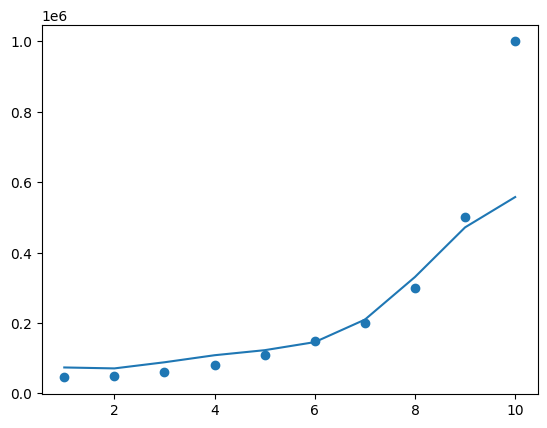

In [168]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y))
plt.plot( sc_X.inverse_transform(X),sc_y.inverse_transform(regressor.predict( X ).reshape(-1,1)) )



In [166]:
sc_y.inverse_transform(regressor.predict( X ).reshape(-1,1))

array([[ 73474.15615697],
       [ 70786.94584626],
       [ 88213.00902103],
       [108254.98574956],
       [122574.52250599],
       [145503.10688572],
       [209410.23132923],
       [330606.89204569],
       [471671.95587315],
       [557821.75899897]])

In [175]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

In [14]:
X_grid = np.arange( min(sc_X.inverse_transform(X1)) , max(sc_X.inverse_transform(X1)) , 0.1 )
X_grid = X_grid.reshape(len(X_grid) ,1)



# plt.scatter(sc_X.inverse_transform(X1) , sc_y.inverse_transform(y1))
# # plt.plot( sc_X.inverse_transform(X1), sc_y.inverse_transform( regressor.predict(X1).reshape(-1,1)  )     )
# plt.plot( X_grid , sc_y.inverse_transform( regressor.predict(sc_X.transform(X_grid) ).reshape(-1,1) )  )



/var/folders/15/p551z5bx22l9wb197m4k8bqm0000gn/T/ipykernel_3161/3167103740.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange( min(sc_X.inverse_transform(X1)) , max(sc_X.inverse_transform(X1)) , 0.1 )


In [15]:
X_grid

array([[1. ],
       [1.1],
       [1.2],
       [1.3],
       [1.4],
       [1.5],
       [1.6],
       [1.7],
       [1.8],
       [1.9],
       [2. ],
       [2.1],
       [2.2],
       [2.3],
       [2.4],
       [2.5],
       [2.6],
       [2.7],
       [2.8],
       [2.9],
       [3. ],
       [3.1],
       [3.2],
       [3.3],
       [3.4],
       [3.5],
       [3.6],
       [3.7],
       [3.8],
       [3.9],
       [4. ],
       [4.1],
       [4.2],
       [4.3],
       [4.4],
       [4.5],
       [4.6],
       [4.7],
       [4.8],
       [4.9],
       [5. ],
       [5.1],
       [5.2],
       [5.3],
       [5.4],
       [5.5],
       [5.6],
       [5.7],
       [5.8],
       [5.9],
       [6. ],
       [6.1],
       [6.2],
       [6.3],
       [6.4],
       [6.5],
       [6.6],
       [6.7],
       [6.8],
       [6.9],
       [7. ],
       [7.1],
       [7.2],
       [7.3],
       [7.4],
       [7.5],
       [7.6],
       [7.7],
       [7.8],
       [7.9],
       [8. ],
      

In [16]:
sc_X.inverse_transform(X1)

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]])

In [17]:
sc_X.inverse_transform(X_grid)

array([[ 8.37228132],
       [ 8.65950946],
       [ 8.94673759],
       [ 9.23396572],
       [ 9.52119385],
       [ 9.80842198],
       [10.09565012],
       [10.38287825],
       [10.67010638],
       [10.95733451],
       [11.24456265],
       [11.53179078],
       [11.81901891],
       [12.10624704],
       [12.39347518],
       [12.68070331],
       [12.96793144],
       [13.25515957],
       [13.54238771],
       [13.82961584],
       [14.11684397],
       [14.4040721 ],
       [14.69130023],
       [14.97852837],
       [15.2657565 ],
       [15.55298463],
       [15.84021276],
       [16.1274409 ],
       [16.41466903],
       [16.70189716],
       [16.98912529],
       [17.27635343],
       [17.56358156],
       [17.85080969],
       [18.13803782],
       [18.42526595],
       [18.71249409],
       [18.99972222],
       [19.28695035],
       [19.57417848],
       [19.86140662],
       [20.14863475],
       [20.43586288],
       [20.72309101],
       [21.01031915],
       [21